### tkinter를 이용한 GUI 프로그램 기본 구조
파이썬 GUI 프로그램은 tkinter 모듈을 이용하여 작성할 수 있다. tkinter 모듈의 위젯을 화면에 배치하고 위젯의 옵션을 설정하여 GUI 프로그램을 작성한다.

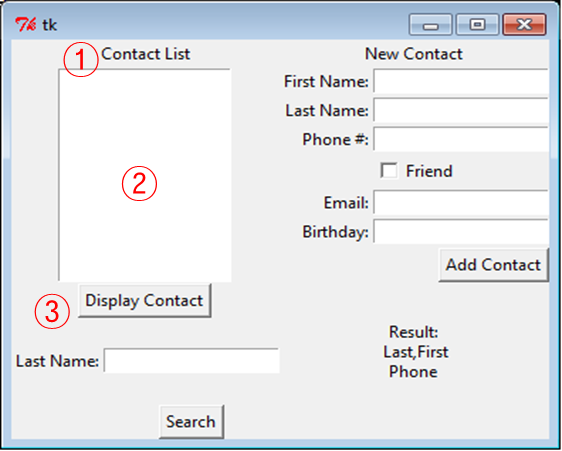

<위젯의 종류>
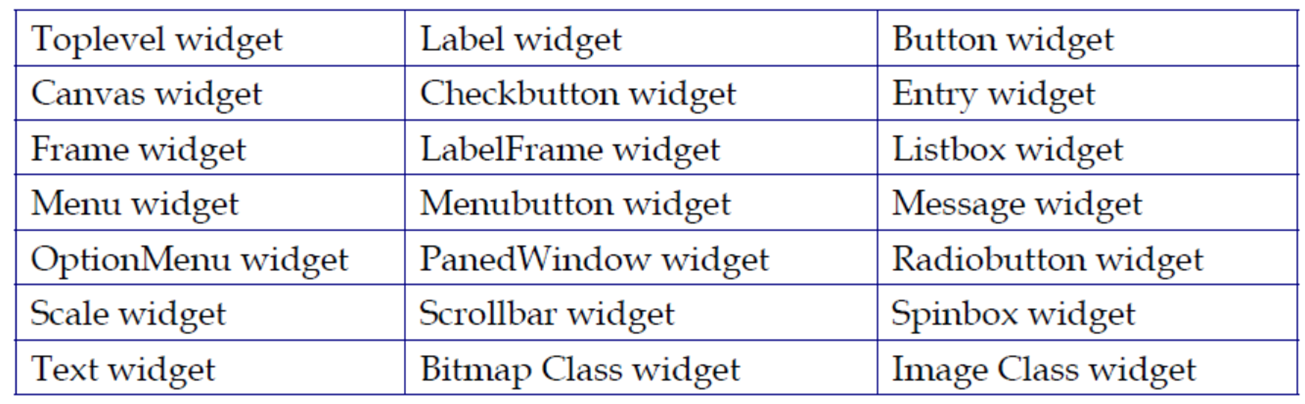

```python
from tkinter import *
# root window 생성
root = Tk()

#프로그램 몸체
# 위젯 객체 생성과 배치, 설정
main body

#이벤트 루프 실행
root.mainloop()
```

### Label 위젯을 이용한 문자열 표시

+ 윈도우 창 위치와 크기(생략하면 죄측 위에 배치)  
```
root = Tk()
root.geometry("너비 x 높이 + x좌표 + y좌표")  
```

+ Label 위젯  
  화면에 문자열을 표시하기 위해 사용
+ Label 위젯 사용법
```python
   label = Label(root, text='', font=(type, size, style), 
           bg=color, fg=color)
   label.pack()
```
  * text = 표시 문자열
  * font = (font_name, size, style)
  * bg = 배경색
  * fg = 글자색


**Label을 이용하여 문자열 표시하기**  

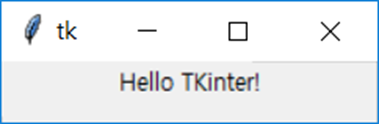

In [13]:
from tkinter import *

root = Tk()
root.geometry("200x50+100+100") #윈도우 크기와 위치(+: 좌측위 기준, -: 우측 아래 기준)
label = Label(root, text="Hello Tkinter!", font=("Verdana", 16))
label.pack()

root.mainloop()

**pack() 함수의 옵션**  
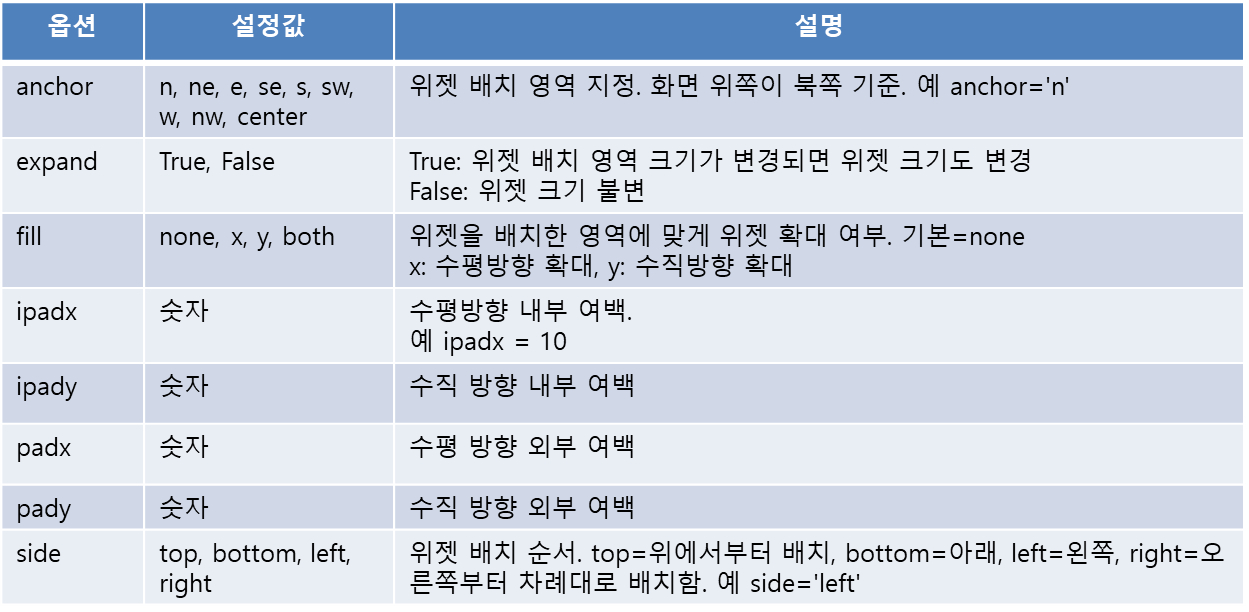

**[연습문제 1]**  
앞에서 작성한 프로그램에서 두 개의 label을 만들어 수평으로 배치해 보자

### Button 위젯 
* 클릭하여 지정된 동작을 실행하기 위해 사용

```python
button = Button(root, text, fg, command)
```
  * root = 버튼 배치 윈도우
  * text = 표시 문자열
  * fg = 글자색
  * command = 버튼을 클릭하면 실행되는 callback 함수  
    callback 함수를 직접 지정하면 매개변수를 전달할 수 없으나  
    lambda 함수를 이용하면 전달할 수 있다.

```
command = lambda parameters = values: callback(parameters)
```

#### Button 위젯을 이용한 callback 함수 실행
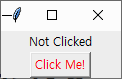

* Button을 클릭하면 callback 함수 실행
* callback 함수에서 라벨 위젯 수정  
```
label.configure(parameters)
```

In [3]:
# 버튼을 클릭하면 라벨 메시지와 색상 변경
def callback(msg):
    label.configure(fg="blue", text = msg)

In [4]:
from tkinter import *

root = Tk()

# 윈도우 창 제목
root.title("Button Click Program") 

# 라벨 배치
label = Label(text = "Not Clicked")
label.pack()

# 버튼 배치
msg = "Button이 클릭되었습니다"
# text = 버튼 문자, fg = 글자색, command = 클릭하면 콜백 함수
button = Button(text="Click Me!", fg="red",
                command = lambda para=msg: callback(para))
button.pack()

root.mainloop()

### Checkbutton과 Radiobutton을 이용한 사용자 선택 표시
Checkbutton  
* 사용자의 선택 여부를 표시하는 위젯
* 선택 여부를 BooleanVar 변수로 표시
* 선택되면(checked) True 반환  

Radiobutton
* 그룹의 항목 중 하나를 선택하기 위한 위젯
* 선택된 항목은 IntVar 변수로 표시

 \[예제] 다음과 같이 한 개의 체크버튼과 두 개의 라디오 버튼을 배치하여 사용자 선택을 확인하는 프로그램  
 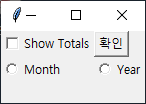
 
(1) [확인] Button callback 함수  
- Checkbutton의 체크 상태를 확인하여 라벨로 표시한다  
- Radiobutton 중 선택된 버튼을 라벨로 표시한다

In [16]:
from tkinter import *

def display():
    label_text = ''
    # 체크 버튼의 상태를 읽어온다
    if check_state.get() == True:
        label_text += "'Show Totals' checked"
    else:
        label_text += "'Show Totals' unchecked"
    
    # 라디오 버튼의 값을 읽어온다
    if calendar.get() == 1:
        label_text += " and 'Month' selected"
    elif calendar.get() == 2:
        label_text += " and 'Year' selected"
        
    # 라벨 텍스트 변경
    label.configure(text = label_text)

(2) Checkbutton을 배치하고 체크 상태를 저장하는 변수 정의  
```
Checkbutton(root, text, var)
  text = 체크버튼 옆에 표시할 문자열
  var = 체크버튼의 상태 저장 변수
```

In [17]:
root = Tk()

# Checkbutton 상태 저장 변수 선언
check_state = BooleanVar()
# Checkbutton의 상태 변수를 var 옵션에 할당
check = Checkbutton(root, text = 'Show Totals', var=check_state)

(3) Radiobutton을 두 개 배치한다  
```
Radiobutton(text, var, value)
```
+ Radiobutton 마다 고유값을 할당한다(value 옵션)
+ Radiobutton의 고유값은 IntVar 변수로 표시한다(var 옵션)  
+ 같은 그룹에 속하는 Radiobutton은 모두 같은 변수 이름을 갖는다  

In [18]:
# Radiobutton의 고유값 저장 변수
calendar = IntVar()

# var = 같은 그룹에 속하는 Radiobutton의 고유값을 저장하는 변수
# value = 각 Radiobutton에 할당된 값
monthbutton = Radiobutton(text ='Month', var = calendar, value=1)
yearbutton = Radiobutton(text ='Year', var = calendar, value=2)

(4) Button을 배치하고 callback 함수를 지정한다

In [19]:
button = Button(text='확인', command=display)
label = Label()

(5) 위젯을 모두 배치한다  
```
위젯.grid(row=0, column=0)
```
* grid(option) 함수  
  (row, column)을 지정하여 위젯을 배치한다  
  (0,0), (0,1), (0,2)  
  (1,0), (1,1), (1,2)  
  (2,0), (2,1), (2,2)
  


In [20]:
check.grid(row=0, column=0, sticky=W)
button.grid(row=0, column=1, sticky=W)
monthbutton.grid(row=1, column=0, sticky=W)
yearbutton.grid(row=1, column=1)
label.grid(row=2, column=0)

root.mainloop()

### Entry 위젯
 
* GUI 프로그램에서 사용자 정보 입력  

* Entry 위젯 생성
```python
entry = Entry(font=('Verdana', 16), width=4) ◀ Entry 위젯 생성
    font = Entry 창 글자 형태(font_name, size, style)
    width = Entry 창에 표시할 글자 수
```
  * 입력 읽기  
```
    string_value = entry.get() ◀ Entry 내용을 문자열로 읽는다  
    num_value = float(entry.get()) ◀ Entry 내용을 실수로 변환
```
  * 입력 창에 문자 넣기  
```
entry.insert(0, 'Hello') ◀ Entry 0번 위치에 문자열을 넣는다
```

  * 입력 창 지우기  
```
entry.delete(0, END)
```

#### Entry 창의 섭씨 온도를 읽어 화씨로 변환하고 라벨로 표시
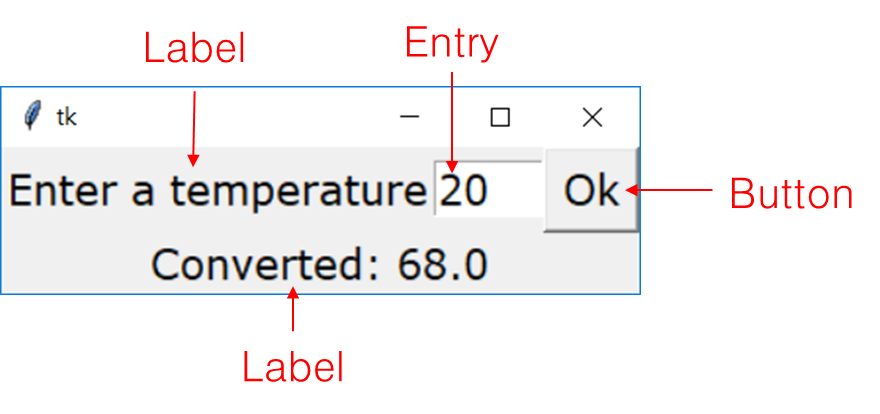

**[OK] 버튼 콜백 함수**  
Entry 창의 섭씨 값을 화씨로 변환하여 라벨로 표시한다

In [6]:
# [OK] 버튼 콜백 함수
from tkinter import *

# Entry 창의 값을 화씨로 변환하여 라벨로 표시한다
def calculate(event=None):
    # Entry 창의 값을 읽는다
    temp = float(entry.get())
    # 화씨로 변환
    temp = 9/5*temp+32
    # 화씬 온도를 라벨로 표시
    output_label.configure(text = 'Converted: {:.1f}'.format(temp))
    # Entry 창을 지운다
    entry.delete(0,END)

**메인 함수**
* 화씨 온도를 표시할 라벨 생성
* 섭씨 온도를 입력할 Entry 위젯 배치
* Entry 위젯과 이벤트 결합   
  bind() 함수를 이용하여 Entry 위젯에서 발생하는 이벤트(Return 키 누름)와 callback 결합  
  이벤트 callback은 event를 인수로 갖는다  
```
entry.bind("<Return>", calculate)
# <Return> : 이벤트
# calculate : 콜백
```
* [OK] 버튼 배치

In [7]:
root = Tk()

# 라벨 위젯 생성
message_label = Label(text='Enter a temperature  ',font=('Verdana', 16))
output_label = Label(font=('Verdana', 16))

# Entry 위젯 생성과 이벤트 - callback 결합
# <Return> 키를 입력하면 calculate callback 함수 실행
entry = Entry(font=('Verdana', 16), width=4)
entry.bind("<Return>", calculate)

#  버튼 위젯
calc_button = Button(text='Ok', font=('Verdana', 16), command=calculate)

# 위젯 배치
message_label.grid(row=0, column=0, sticky=W)
entry.grid(row=0, column=1)
calc_button.grid(row=0, column=2, padx=3, pady=3)
output_label.grid(row=1, column=0, columnspan=3)

mainloop()

**[연습문제 2]**  
화씨 온도를 표시하는 Entry를 추가하여 아래 그림과 같이 프로그램을 수정하라  
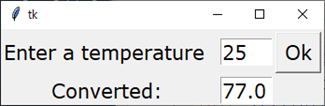

**[예제]**  
버튼을 하나 배치하고 OFF이면 Blue, ON이면 Red로 버튼 이름과 색상이 설정된다. 버튼을 클릭할 때 마다 ON, OFF가 바뀌도록 프로그램하시오  
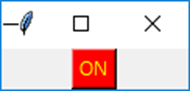 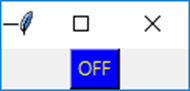

### 프레임 위젯을 이용한 화면 구성
* 프레임 위젯은 위젯을 담는 그릇과 같은 역활을 한다  
* 윈도우 창에 프레임을 먼저 배치하고 프레임 위에 위젯을 배치한다  
* 프레임을 사용하면 윈도우 구성이 쉬워진다

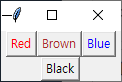

In [15]:
# 윈도우를 생성하고 크기 지정
from tkinter import *
root = Tk()
root.geometry("100x50")

''

두 개의 프레임을 만들어 위 아래로 배치한다

In [16]:
# 위 프레임 생성
topframe = Frame(root)
topframe.pack(side=TOP)

# 아래 프레임 생성
bottomframe = Frame(root)
bottomframe.pack()

위 쪽 프레임에 세 개의 버튼을 배치한다

In [17]:
redbutton = Button(topframe, text= "Red", fg="red")
redbutton.pack(side=LEFT)

brownbutton = Button(topframe, text= "Brown", fg="brown")
brownbutton.pack(side=LEFT)

bluebutton = Button(topframe, text= "Blue", fg="blue")
bluebutton.pack(side=LEFT)

아래 프레임에 한 개의 버튼을 배치한다

In [18]:
blackbutton = Button(bottomframe, text="Black", fg="black")
blackbutton.pack(side=BOTTOM)

root.mainloop()

### Text 위젯을 이용한 문자열 표시
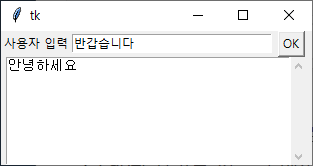

Entry 위젯에 입력한 내용을 Text 위젯에 표시한다

[OK] 버튼을 클릭하면 실행할 callback 정의
* Entry 내용을 읽어 Text 창에 표시한다
* Entry 내용을 지운다

In [19]:
from tkinter import *
from tkinter.scrolledtext import ScrolledText

def put_message():
    global entry, textbox
    msg = entry.get() #Entry 내용을 읽어 온다
    textbox.insert(END, msg+'\n') #Entry 내용을 Text 상자에 추가
    entry.delete(0,END) #Entry 내용을 지운다

라벨, Entry, 버튼 위젯 배치

In [20]:
root = Tk()

# 라벨 위젯 배치
label = Label(text="사용자 입력")
label.grid(row=0, column=0, sticky=W)

# Entry 위젯 배치
entry = Entry(width=28)
entry.grid(row=0, column=1, sticky=W)

# 버튼 위젯 배치
button = Button(text="OK", command=put_message)
button.grid(row=0, column=2, padx=5, sticky=W)

Scroll이 가능한 Text 라벨을 배치한다
```
ScrolledText(height=8, width=40)
    height = 라인 수
    width = 한 줄 글자 수
````


In [21]:
# Text 위젯 배치
textbox = ScrolledText(height=8, width=40) #Scroll Text Box
textbox.grid(row=1, column=0, padx=5,columnspan=3)

root.mainloop()

### Canvas 위젯
Canvas 위젯을 이용하여 아래와 같은 그림을 그린다. 이 그림은 4개의 선과 두 개의 사각형, 문자열로 구성되어 있다

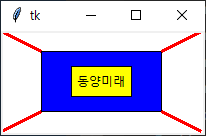

```
Canvas 만들기
canvas = Canvas(root, width, height, bg)
           
선 그리기
canvas.create_line(x1, y1, x2, y2, fill, width)

사각형 그리기
create_rectangle(x1, y1, x2, y2, color)
```

In [9]:
from tkinter import *

# Canvas 크기 지정
canvas_width = 200
canvas_height = 100

# 사용할 색상 지정
colours = ("blue", "yellow", "red")
# 사각형의 좌표 저장 변수
box=[]

# 사각형의 좌표 설정
for ratio in ( 0.2, 0.35 ):
   box.append( (canvas_width * ratio,
                canvas_height * ratio,
                canvas_width * (1 - ratio),
                canvas_height * (1 - ratio) ) )

root = Tk()

# Canvas 생성
# 배경색 - white
canvas = Canvas(root, 
           width=canvas_width, 
           height=canvas_height, bg="white")
canvas.pack()

# 두 개의 사각형 그리기
for i in range(2):
   # create_rectangle(x1, y1, x2, y2, color)
   # (x1, y1) = 좌측 아래 좌표, (x2, y2) = 우측 위 좌표
   canvas.create_rectangle(box[i][0], box[i][1],box[i][2],box[i][3], fill=colours[i])

# 선 그리기
# create_line(x1, y1, x2, y2, fill, width)
# (x1, y1) = 시작점, (x2, y2) + 끝점
# fill = 선 색, width = 선 두께
canvas.create_line(0, 0,
              box[0][0], box[0][1],
              fill=colours[2], 
              width=3)
canvas.create_line(0, canvas_height,
              box[0][0], box[0][3],
              fill=colours[2], 
              width=3)
canvas.create_line(box[0][2],box[0][1],  
              canvas_width, 0, 
              fill=colours[2], 
              width=3)
canvas.create_line(box[0][2], box[0][3],
              canvas_width, canvas_height,
              fill=colours[2], width=3)

# 글자 넣기
# create_text(x, y, text)
# (x,y) = 글자 중심 위치
# text = 표시할 문자열
canvas.create_text(canvas_width / 2,
              canvas_height / 2,
              text="동양미래")
mainloop()

**Canvas 위젯을 이용하여 그림 표시하기**  
(1) Canvas를 생성하고  
(2) 이미지를 불러온다  
(3) 불러온 이미지 표시하기

In [12]:
from tkinter import *

root = Tk()
root.title("Lenna")

# Canvas 생성
canvas = Canvas(width=256, height=256, bg='white')

# 이미지 불러오기
lenna = PhotoImage(file='solutions/lenna.png')

# 이미지 표시하기
canvas.create_image(128, 128, image = lenna)
canvas.pack()

mainloop()

### after() 메서드를 이용한 함수의 반복 실행

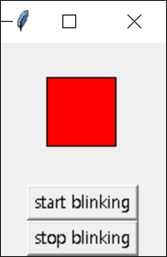

after() 메서드를 이용하여 1초 마다 사각형의 색상이 깜박이는 GUI 프로그램
```
after(time, callback)
    time = 지연시간
    callback = 호출할 콜백 함수
```

In [5]:
from tkinter import * 

class MyApp(Tk): 
    def __init__(self): 
     Tk.__init__(self)
     self.geometry("300x200-100+100")
     fr = Frame(self).pack()
     
     # 캔버스 생성
     self.canvas = Canvas(fr, height = 100, width = 100) 
     self.canvas.pack()
    
     # 캔버스 위에 사각형을 그린다
     # canvas.create_rectangle(x1, y1, x2, y2)
     self.rect = self.canvas.create_rectangle(25, 25, 75, 75, fill = "white") 
        
     # 깜박임 설정
     self.do_blink = False 
     
     # 깜박임 시작 버튼 
     start_button = Button(self, text="start blinking", 
           command=self.start_blinking) 
     
     # 깜박임 정지 버튼
     stop_button = Button(self, text="stop blinking", 
           command=self.stop_blinking) 
     start_button.pack() 
     stop_button.pack() 

        
    # 깜박임 시작 버튼 콜백 함수
    def start_blinking(self): 
     self.do_blink = True 
     self.blink() 

        
    # 깜박임 정지 버튼 콜백 함수
    def stop_blinking(self): 
     self.do_blink = False 

    
    # 사각형을 깜박이는 함수
    def blink(self): 
     if self.do_blink: 
      
      # 사각형의 현재 색상을 가져온다
      current_color = self.canvas.itemcget(self.rect, "fill") 
      # 사각형의 색상을 반대로 지정
      new_color = "red" if current_color == "white" else "white" 
      # 사각형의 색상을 지정 색상으로 다시 설정
      self.canvas.itemconfigure(self.rect, fill=new_color) 
      # 1초 후 다시 blink() 함수 호출
      self.after(1000, self.blink) 


if __name__ == "__main__": 
    root = MyApp() 
    root.mainloop() 
